# Quasi-Random Sequence Generator Comparison

QMCPy's low-discrepancy-sequence generators are built upon generators developed by
1. D. Nuyens, *The Magic Point Shop of QMC point generators and generating vectors.*<br>
MATLAB and Python software, 2018. Available from https://people.cs.kuleuven.be/~dirk.nuyens/

In [1]:
from qmcpy import *

import pandas as pd
pd.options.display.float_format = '{:.2e}'.format

from numpy import *

from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

## General Lattice & Sobol Generator Usage
The following example uses the `Lattice` object to generate samples.<br>
The same code works when replacing `Lattice` with `Sobol`

In [2]:
# Unshifted Samples
lattice_gen = Lattice(rng_seed=7)
unshifted_samples = lattice_gen.gen_dd_samples(replications=1, n_samples=4, dimensions=2, scramble=False)
print('Shape:',unshifted_samples.shape)
print('Samples:\n'+str(unshifted_samples))

Shape: (4, 2)
Samples:
[[ 0.000  0.000]
 [ 0.500  0.500]
 [ 0.250  0.750]
 [ 0.750  0.250]]


In [3]:
# Shifted Samples
lattice_gen = Lattice(rng_seed=7)
shifted_samples = lattice_gen.gen_dd_samples(replications=2, n_samples=2, dimensions=3) # defaults scramble=True
print('Shape:',shifted_samples.shape)
print('Samples:\n'+str(shifted_samples))

Shape: (2, 2, 3)
Samples:
[[[ 0.625  0.897  0.776]
  [ 0.125  0.397  0.276]]

 [[ 0.225  0.300  0.874]
  [ 0.725  0.800  0.374]]]


In [4]:
# Next Shifted Samples from same Lattice instance
next_shifted_samples = lattice_gen.gen_dd_samples(replications=2, n_samples=2, dimensions = 3)
print('Shape:',next_shifted_samples.shape)
print('Samples:\n'+str(next_shifted_samples))

Shape: (2, 2, 3)
Samples:
[[[ 0.875  0.647  0.526]
  [ 0.375  0.147  0.026]]

 [[ 0.475  0.050  0.624]
  [ 0.975  0.550  0.124]]]


In [5]:
next_next_shifted_samples = lattice_gen.gen_dd_samples(replications=2, n_samples=4, dimensions = 3)
print('Shape:',next_next_shifted_samples.shape)
print('Samples:\n'+str(next_next_shifted_samples))

Shape: (2, 4, 3)
Samples:
[[[ 0.750  0.272  0.151]
  [ 0.000  0.022  0.901]
  [ 0.250  0.772  0.651]
  [ 0.500  0.522  0.401]]

 [[ 0.350  0.675  0.249]
  [ 0.600  0.425  0.999]
  [ 0.850  0.175  0.749]
  [ 0.100  0.925  0.499]]]


Once replications and dimensions are set in the first call to gen_dd_samples, they are enforce in folowing calls.<br> 
The fist call to gen_dd_samples can take any n_samples = $2^i$. However, following calls require n_samples to be $2^i$ then $2^{i+1}$ then $2^{i+2}$ then ... <br>
Rerunning the previous 3 blocks with different parameters may help clarify. 

## *Magic Point Shop* Generators vs QMCPy Generators
In an effort to improve the generators speed, QMCPy developers modified the algorithms developed in *The Magic Point Shop*.<br>
The following blocks visualize the speed improvement of QMCPy when generating <b> 1 dimensional</b> unshifted/unscrambled sequences.<br>
Data for the following plots can be generated by running
~~~
python workouts/wo_lds_sequences/mps_original_vs_qmcpy.py
~~~

In [6]:
df_mps = pd.read_csv('../outputs/lds_sequences/magic_point_shop_times.csv')
df_mps.n_2power = df_mps.n_2power.astype(int)
df_mps

,n_2power,mps_lattice_time,qmcpy_lattice_time,mps_Sobol_time,qmcpy_Sobol_time
0,1,9.25e-05,1.38e-04,9.34e-01,9.10e-03
1,2,7.80e-05,9.68e-05,9.46e-01,9.10e-03
2,3,1.15e-04,1.18e-04,9.64e-01,9.31e-03
3,4,1.72e-04,1.42e-04,9.28e-01,9.04e-03
4,5,2.54e-04,1.35e-04,9.45e-01,8.69e-03
5,6,4.61e-04,1.44e-04,9.04e-01,8.72e-03
6,7,8.55e-04,1.65e-04,9.23e-01,8.73e-03
7,8,1.72e-03,1.86e-04,9.01e-01,9.13e-03
8,9,3.30e-03,2.23e-04,9.35e-01,9.81e-03
9,10,6.88e-03,2.73e-04,9.07e-01,1.09e-02


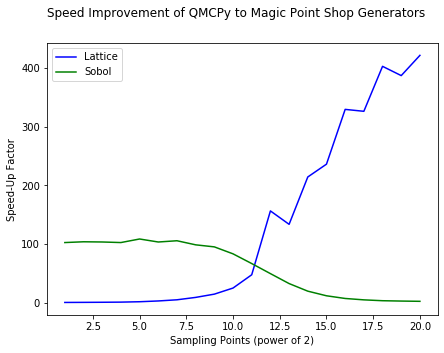

In [7]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
n_power2 = df_mps.n_2power
suf_lattice = df_mps.mps_lattice_time.values / df_mps.qmcpy_lattice_time.values
ax.plot(n_power2, suf_lattice, label='Lattice', color='b')
suf_Sobol = df_mps.mps_Sobol_time.values / df_mps.qmcpy_Sobol_time.values
ax.plot(n_power2, suf_Sobol, label='Sobol', color='g')
ax.legend(loc='upper left')
ax.set_xlabel('Sampling Points (power of 2)')
ax.set_ylabel('Speed-Up Factor')
fig.suptitle('Speed Improvement of QMCPy to Magic Point Shop Generators')
plt.savefig('../outputs/lds_sequences/mps_vs_qmcpy_generators.png', dpi=200)

## MATLAB vs Python Generator Speed
Compare the speed of low-discrepancy-sequence generators from MATLAB and Python.<br>
The following blocks visualize the speed improvement of MATLAB when generating <b> 1 dimensional</b> shifted/scrambled sequences.<br>
In the future, we hope to see similar generating times between the two langauges<br>
Python data for the following plots can be generated by running
~~~
python workouts/wo_lds_sequences/qmcpy_sequences.py
~~~
MATLAB data can be generated by running the file at `workouts/wo_lds_sequences/matlab_sequences.py`

<b>Notes</b>
- For Python both generators are part of the qmcpy package, located at `qmcpy/discrete_distribution/lds_generators.py`
- For MATLAB, the Sobol generator is built in, while the lattice generator is part of the GAIL package:
    - Sou-Cheng T. Choi, Yuhan Ding, Fred J. Hickernell, Lan Jiang, Lluis Antoni Jimenez Rugama, Da Li, Jagadeeswaran Rathinavel, Xin Tong, Kan Zhang, Yizhi Zhang, and Xuan Zhou, GAIL: Guaranteed Automatic Integration Library (Version 2.3) [MATLAB Software], 2019. Available from http://gailgithub.github.io/GAIL_Dev/
    - lattice_gen from: https://github.com/GailGithub/GAIL_Dev/blob/master/Algorithms/%2Bgail/lattice_gen.m

In [8]:
df_matlab = pd.read_csv('../outputs/lds_sequences/matlab_sequence_times.csv', header=None)
df_matlab.columns = ['n_2power', 'matlab_Lattice_time', 'matlab_Sobol_time']
df_python = pd.read_csv('../outputs/lds_sequences/python_sequence_times.csv')
df_python.columns = ['n_2power', 'python_Lattice_time', 'python_Sobol_time']
df_languages = pd.concat([df_matlab[['n_2power','matlab_Lattice_time']],df_python['python_Lattice_time'],\
                    df_matlab['matlab_Sobol_time'],df_python['python_Sobol_time']], axis=1)
df_languages.head()

,n_2power,matlab_Lattice_time,python_Lattice_time,matlab_Sobol_time,python_Sobol_time
0,1,4.94e-04,2.22e-04,8.32e-04,7.53e-04
1,2,3.22e-04,3.01e-04,8.03e-04,8.03e-04
2,3,3.97e-04,3.67e-04,6.44e-04,4.91e-04
3,4,2.39e-04,2.10e-04,5.17e-04,4.42e-04
4,5,5.89e-04,2.03e-04,9.60e-04,4.68e-04


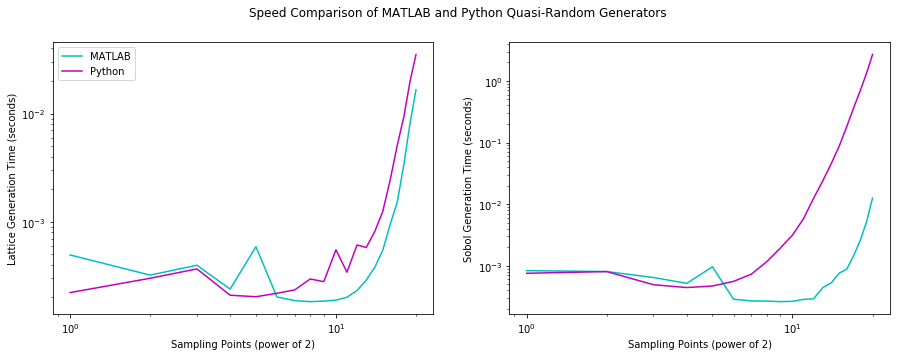

In [9]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
n_power2 = df_languages.n_2power
for i,lds_name in enumerate(['Lattice','Sobol']):
    ax[i].loglog(n_power2, df_languages['matlab_%s_time'%lds_name], label='MATLAB', color='c')
    ax[i].loglog(n_power2, df_languages['python_%s_time'%lds_name], label='Python', color='m')
ax[0].legend(loc='upper left')
ax[0].set_xlabel('Sampling Points (power of 2)')
ax[0].set_ylabel('Lattice Generation Time (seconds)')
ax[1].set_xlabel('Sampling Points (power of 2)')
ax[1].set_ylabel('Sobol Generation Time (seconds)')
fig.suptitle('Speed Comparison of MATLAB and Python Quasi-Random Generators')
plt.savefig('../outputs/lds_sequences/matlab_vs_python_generators.png', dpi=200)